<a href="https://colab.research.google.com/github/rmounica/prog_quiz/blob/main/prog_quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1])
dataset = df.values.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split dataset into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(np.mean((trainY[0] - trainPredict[:,0]) ** 2))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean((testY[0] - testPredict[:,0]) ** 2))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/100
94/94 - 4s - loss: 0.0629 - 4s/epoch - 44ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0315 - 150ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0231 - 158ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0211 - 152ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0203 - 161ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0191 - 150ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0180 - 149ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0169 - 149ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0160 - 150ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0149 - 149ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0140 - 168ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0130 - 174ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0121 - 151ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0111 - 161ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0100 - 149ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0091 - 150ms/epoc

Epoch 1/100
11/11 [==============================] - 5s 21ms/step - loss: 0.1940
Epoch 2/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0557
Epoch 3/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0442
Epoch 4/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0368
Epoch 5/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0348
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0329
Epoch 7/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0308
Epoch 8/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0284
Epoch 9/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0257
Epoch 10/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0225
Epoch 11/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0177
Epoch 12/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0120
Epoch 13/100
11/11 [=====

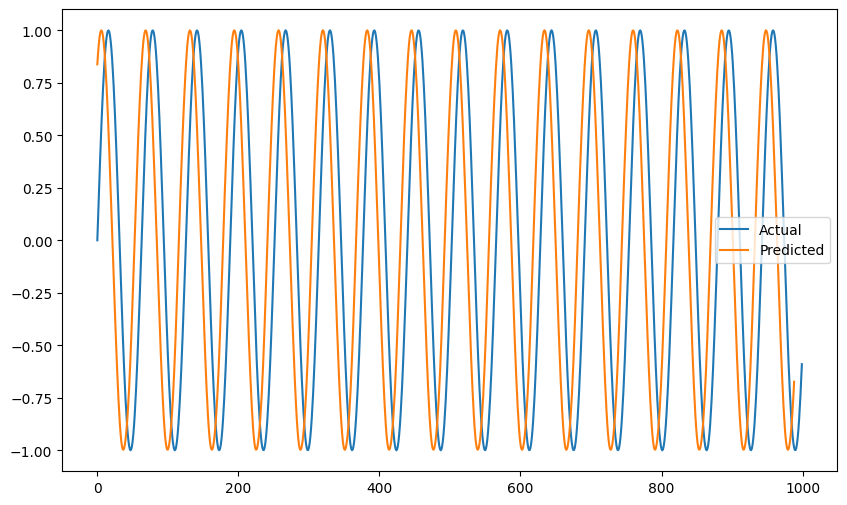

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your time series dataset
# For this example, let's use a simple sine wave
data = np.sin(np.arange(0, 100, 0.1))

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Prepare the data for LSTM model
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Reshape input data to be 3D [samples, time steps, features] as required by LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data, label='Actual')
plt.plot(np.concatenate([train_predict, test_predict]), label='Predicted')
plt.legend()
plt.show()